In [ ]:
import torch

from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

# Modelo Pre-Entrenado
---



In [ ]:
inception = models.inception_v3(pretrained=True)

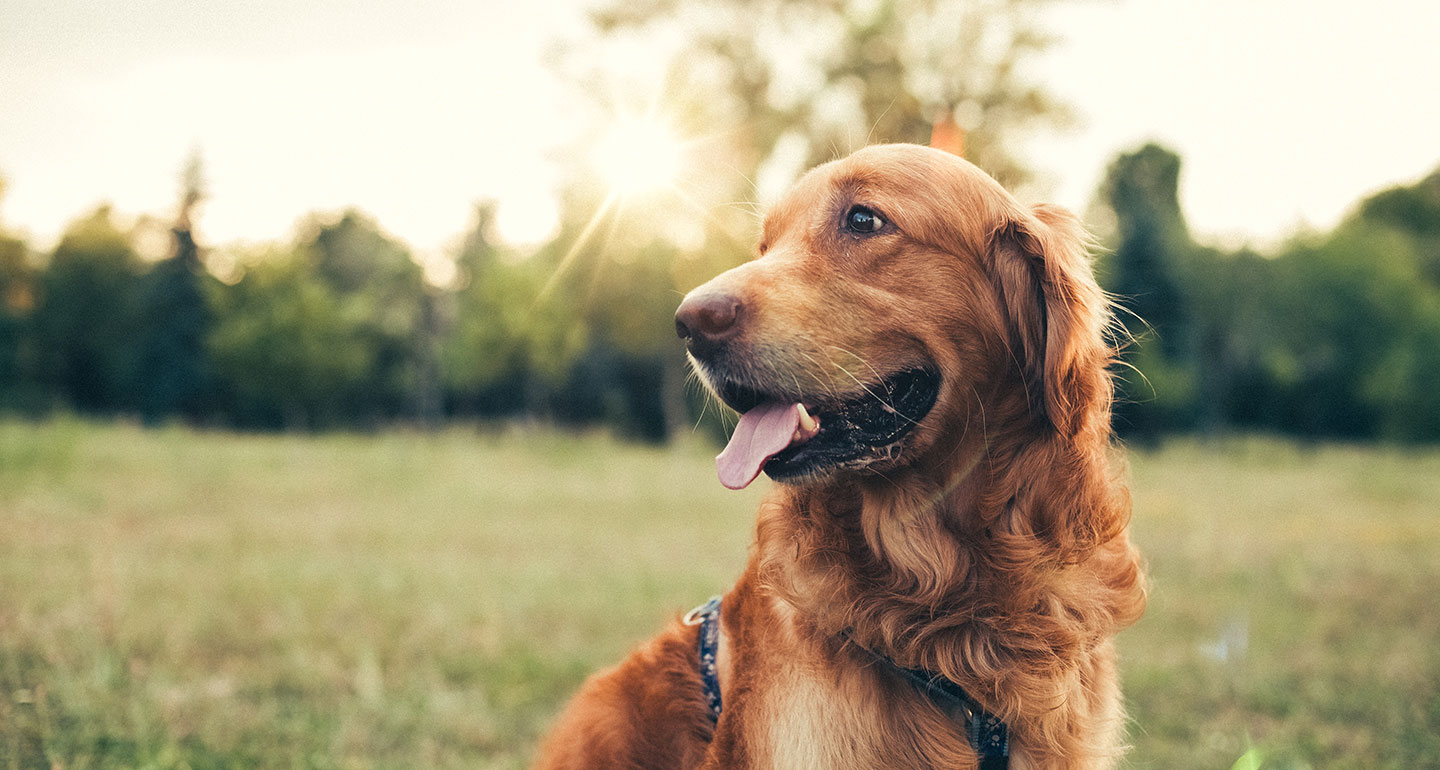

In [ ]:
url = 'https://s3.amazonaws.com/petcentral.com/wp-content/uploads/2016/09/26151523/Golden-Retriever-Dog-Breed.jpg'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

#Se refiere a poner a todos los datos en una escala similar

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


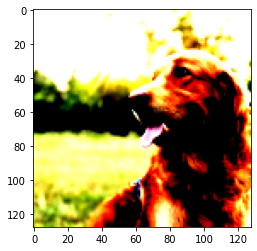

In [ ]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1, 2, 0))

In [ ]:
inception.eval()

In [ ]:
#Hasta el momento tenemos solo un tensor representado en numeros incompresibles
# para la vista.
#Si entra un tensor, necesariamente saldra un tensor tambien
out = inception(batch)
out

In [ ]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [ ]:
# Las salidas de la funcion max son dos, para este caso nos interesa unicamente el index
_, index = torch.max(out, 1)

In [ ]:
# Buscamos el poncentaje de considencias que la RN esta reconociendo
# Utilizamos la funcion softmax
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('redbone', 99.99951171875)

# Trabajando con un dataset

---



In [ ]:
# Guardar el dataset en el directorio local de Collab.
# Existen multiples opciones de CIFAR10, que recibe el path, si es 
# para entrenamiento o no y si lo voy a descargar o no

data_path = 'data/'
dataset = datasets.CIFAR10(data_path, train=True, download=True)
validation_set = datasets.CIFAR10(data_path, train=False, download=True)

# Dependiendo del tamaño del dataset, lo podemos dividir en multiples formas.

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Identificar las clases que reconocer el CIFAR

classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']


In [ ]:
len(dataset)

50000

In [ ]:
# Tomamos del dataset la imagen como la etiqueta.

img, label = dataset[50]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F4136FE7240>, 9, 'truck')

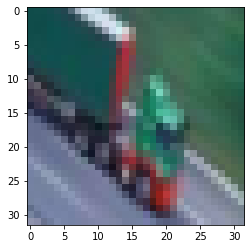

In [ ]:
plt.imshow(img)

In [ ]:
#Transformamos la imagen en un tensor

tensor_transform = transforms.ToTensor()

img_tensor = tensor_transform(img)
# Podemos ver el shape con la funcion shape.
img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F4136FE7240>,
 tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
          [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
          [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
          ...,
          [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
          [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
          [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],
 
         [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
          [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
          [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
          ...,
          [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
          [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
          [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],
 
         [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
          [0.2902, 0.2902, 0.2902,  ..., 0

In [ ]:
#Le decimos que ocupamos que la transformacion se un tensor.

dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [ ]:
img, label = dataset[50]
img

tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

In [ ]:
img.min(), img.max()

(tensor(0.0314), tensor(0.9529))

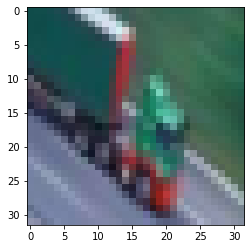

In [ ]:
# Si queremos mostrar la imagen, tenemos que permutarla
plt.imshow(img.permute(1, 2, 0))

In [ ]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [ ]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
#Calcular la media y la desviacion estandar

imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [ ]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
# Necesitamos esta transformacion 

transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
              ])


In [ ]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'frog'

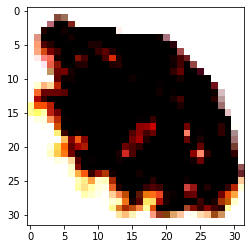

In [ ]:
img_transformed,label = dataset[125]

plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]